## Praticando o Pré-processamento para trabalhar com modelos de Máquina de Aprendizagem.

Dataset escolhido: 93182_steam_games.csv

Link: https://www.kaggle.com/datasets/joebeachcapital/top-1000-steam-games/data

Descrição do dataset: 93182 Games from Steam and SteamSpy as of September 15, 2024

### 1. Leitura de um dataset

Objetivo: Ler e exibir informações básicas de um dataset.
- **Passo 1**: Baixe um dataset em formato ```.csv``` ou ```.xlsx```
- **Passo 2**: Exiba as primeiras 10 linhas do dataset utilizando ```df.head()```.
- **Passo 3**: Exiba informações gerais sobre o dataset (número de linhas, colunas, tipos de dados, valores nulos) com ```df.info()```.

In [1]:
import pandas as pd

# Set the path for the csv file
file_path = '../../dataset/93182_steam_games.csv'

# Read the csv data into the data frame
df = pd.read_csv(file_path, dtype={'Estimated owners': str, 'Tags': str})
# Show the first 10 lines from the data frame 
print(df.head(10))

     AppID                                    Name  Release date  \
0  1424640                                      余烬   Oct 3, 2020   
1   402890                             Nyctophilia  Sep 23, 2015   
2  1151740                         Prison Princess   Apr 2, 2020   
3   875530                            Dead In Time  Oct 12, 2018   
4  1835360                   Panacle: Back To Wild  Mar 11, 2022   
5   431510  Mystic Destinies: Serendipity of Aeons  Feb 11, 2016   
6  1054250                            krAsAvA Shot   Apr 4, 2019   
7  2604580                             THE JUSOU 3  Feb 20, 2024   
8  1154840                           Shadow Empire   Dec 3, 2020   
9   496740                     Discovering Space 2  Mar 10, 2017   

  Estimated owners  Peak CCU  Required age  Price  DLC count  \
0    20000 - 50000         0             0   3.99          0   
1   50000 - 100000         0             0   0.00          0   
2        0 - 20000         0             0  19.99          

In [2]:
# Show information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93182 entries, 0 to 93181
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       93182 non-null  int64  
 1   Name                        93179 non-null  object 
 2   Release date                93182 non-null  object 
 3   Estimated owners            16462 non-null  object 
 4   Peak CCU                    93182 non-null  int64  
 5   Required age                93182 non-null  int64  
 6   Price                       93182 non-null  float64
 7   DLC count                   93182 non-null  int64  
 8   About the game              88392 non-null  object 
 9   Supported languages         93182 non-null  object 
 10  Full audio languages        93182 non-null  object 
 11  Reviews                     10599 non-null  object 
 12  Header image                93182 non-null  object 
 13  Website                     416

### 2. Limpeza de Dados: Remoção de Valores Faltantes

Objetivo: Tratar dados ausentes.
- **Passo 1**: Identifique as colunas que contêm valores nulos (NaN).
- **Passo 2**: Remova ou preencha os valores nulos com a média, mediana ou moda, dependendo do tipo da variável (numérica ou categórica).
    - Para variáveis numéricas: substitua valores nulos pela média ou mediana.
    - Para variáveis categóricas: substitua os valores nulos pela moda (valor mais frequente).
- **Passo 3**: Após o tratamento, verifique se os valores nulos foram realmente removidos ou substituidos.

In [3]:
# Find null columns
null_columns = df.isnull().any()
print(null_columns)

AppID                         False
Name                           True
Release date                  False
Estimated owners               True
Peak CCU                      False
Required age                  False
Price                         False
DLC count                     False
About the game                 True
Supported languages           False
Full audio languages          False
Reviews                        True
Header image                  False
Website                        True
Support url                    True
Support email                  True
Windows                       False
Mac                           False
Linux                         False
Metacritic score              False
Metacritic url                 True
User score                    False
Positive                      False
Negative                      False
Score rank                     True
Achievements                  False
Recommendations               False
Notes                       

In [4]:
from sklearn.impute import SimpleImputer

# Define strategie to impute falty data
imputer = SimpleImputer(strategy='mean')
df[[
    'Score rank'
]] = imputer.fit_transform(df[['Score rank']])

# Drop columns that don't won't be used for now
df_cleaned = df.drop([
    'Estimated owners', 
    'Reviews', 
    'Support url', 
    'Support email',
    'Metacritic url',
    'Score rank',
    'Notes',
    'Tags',
    'Screenshots',
    'Movies',
    'Average playtime forever',
    'Average playtime two weeks',
    'Median playtime forever',
    'Median playtime two weeks'
    ], axis=1)

# Drop rows that have null values
df_cleaned = df_cleaned.dropna(subset=[
    'Name', 
    'Developers', 
    'Publishers', 
    'Categories',
    'Genres'
    ])


In [5]:
# Verify if there's null data on the columns after cleaning
null_columns = df_cleaned.isnull().any()
print(null_columns)

AppID                   False
Name                    False
Release date            False
Peak CCU                False
Required age            False
Price                   False
DLC count               False
About the game           True
Supported languages     False
Full audio languages    False
Header image            False
Website                  True
Windows                 False
Mac                     False
Linux                   False
Metacritic score        False
User score              False
Positive                False
Negative                False
Achievements            False
Recommendations         False
Developers              False
Publishers              False
Categories              False
Genres                  False
dtype: bool


### 3. Conversão de tipo de dados

Objetivo: Corrigir tipos de dados incorretos.
- **Passo 1**: Verifique o tipo de cada coluna utilizando ```df.dtypes```.
- **Passo 2**: Converta colunas de tipo errado (por exemplo, uma coluna numérica que foi lida como string) para o tipo correto.
    - Exemplo: Converta uma coluna de idade de string para inteiro.
- **Passo 3**: Verifique novamente os tipos de dados para garantir que a conversão foi feita corretamente.

In [6]:
# 
print(df_cleaned.dtypes)

AppID                     int64
Name                     object
Release date             object
Peak CCU                  int64
Required age              int64
Price                   float64
DLC count                 int64
About the game           object
Supported languages      object
Full audio languages     object
Header image             object
Website                  object
Windows                    bool
Mac                        bool
Linux                      bool
Metacritic score          int64
User score                int64
Positive                  int64
Negative                  int64
Achievements              int64
Recommendations           int64
Developers               object
Publishers               object
Categories               object
Genres                   object
dtype: object


In [7]:
# Converting columns
df_converted = df_cleaned.convert_dtypes()

print(df_converted.dtypes)

AppID                            Int64
Name                    string[python]
Release date            string[python]
Peak CCU                         Int64
Required age                     Int64
Price                          Float64
DLC count                        Int64
About the game          string[python]
Supported languages     string[python]
Full audio languages    string[python]
Header image            string[python]
Website                 string[python]
Windows                        boolean
Mac                            boolean
Linux                          boolean
Metacritic score                 Int64
User score                       Int64
Positive                         Int64
Negative                         Int64
Achievements                     Int64
Recommendations                  Int64
Developers              string[python]
Publishers              string[python]
Categories              string[python]
Genres                  string[python]
dtype: object


### 4. Remoção de duplicatas

Objetivo: Eliminar entradas duplicadas.
- **Passo 1**: Identifique se há registros duplicados usando ```df.duplicated()```.
- **Passo 2**: Remova os registros duplicados com ```df.drop_duplicates()``` e verifique se o número de linhas diminuiu.
- **Passo 3**: Verifique novamente o dataset para garantir que as duplicatas foram removidas.

In [8]:
# Verify existence of duplicate rows
print(df_converted.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
93177    False
93178    False
93179    False
93180    False
93181    False
Length: 86891, dtype: bool


In [9]:
# Droping duplicate rows
df_converted.drop_duplicates()

# Verifying if the duplicated rows were droped
print(df_converted.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
93177    False
93178    False
93179    False
93180    False
93181    False
Length: 86891, dtype: bool


In [10]:
# Length stayed the same before and after droping duplicates, implying that there were no duplicate rows

### 5. Normalização e padronização de dados

Objetivo: Aplicar técnicas de normalização e padronização.
- **Passo 1**: Selecione colunas numéricas do dataset.
- **Passo 2**: Realize a **normalização** (scaling) das variáveis numéricas, onde os valores estarão entre 0 e 1 (pode usar o ```MinMaxScaler``` do Scikit-learn).
- **Passo 3**: Realize a **padronização**, onde os valores terão média 0 e desvio padrão 1 (pode usar o ```StandardScaler``` do Scikit-learn).
- **Passo 4**: Compare os resultados antes e depois da normalização/padronização.

In [11]:
from sklearn.preprocessing import MinMaxScaler

print(df_converted.head())


columns_to_scale = [
    'Peak CCU',
    'Required age',
    'Price',
    'DLC count',
    'Metacritic score',
    'User score',
    'Positive',
    'Negative',
    'Achievements',
    'Recommendations'
]
scaler = MinMaxScaler()

#df_converted = df_converted.sample(n = 5000, random_state=42)
df_converted[columns_to_scale] = scaler.fit_transform(df_converted[columns_to_scale])

#pd.options.display.float_format = '{:.2f}'.format
pd.options.display.float_format = None

print(df_converted.head())

     AppID                   Name  Release date  Peak CCU  Required age  \
0  1424640                     余烬   Oct 3, 2020         0             0   
1   402890            Nyctophilia  Sep 23, 2015         0             0   
2  1151740        Prison Princess   Apr 2, 2020         0             0   
3   875530           Dead In Time  Oct 12, 2018         0             0   
4  1835360  Panacle: Back To Wild  Mar 11, 2022         2             0   

   Price  DLC count                                     About the game  \
0   3.99          0  'Ashes of war' is an anti war theme adventure ...   
1    0.0          0  NYCTOPHILIA Nyctophilia is an 2D psychological...   
2  19.99          0  ABOUT Now nothing more than a phantom, can the...   
3   7.99          0  Is a hardcore action with a non-trivial level ...   
4   3.99          0  Panacle: Back to the Wild is a indie card game...   

                                 Supported languages  \
0                             ['Simplified Chine

### 6. Criação de variáveis categóricas (Encoding)

Objetivo: Converter variáveis categóricas em variáveis numéricas.
- **Passo 1**: Identifique variáveis categóricas
- **Passo 2**: Aplique a codificação usando uma técnica como **One-Hot Encoding** ou **Label Encoding**.
    - Use ```pd.get_dummies()``` para One-Hot Encoding.
    - Use ```LabelEncoder``` do Scikit-learn para Label Encoding.
- **Passo 3**: Verifique se as variáveis categóricas foram corretamente convertidas para numéricas.

In [12]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

# Sample your data
df_encoded = df_converted.copy()#.sample(n=5000, random_state=42)

# Columns to encode
multi_label_columns = ['Supported languages', 'Full audio languages', 'Categories', 'Genres']

# Updated function handles list, string, np.nan, np.ndarray, etc.
def clean_multilabel(x):
    if x is None:
        return []
    if isinstance(x, float) and pd.isna(x):
        return []
    if isinstance(x, (list, np.ndarray)):
        flat = []
        for item in x:
            flat.extend([s.strip() for s in str(item).split(',') if s.strip()])
        return flat
    else:
        return [s.strip() for s in str(x).split(',') if s.strip()]

# Apply encoding
for col in multi_label_columns:
    df_encoded[col] = df_encoded[col].apply(clean_multilabel)

    mlb = MultiLabelBinarizer()
    encoded = pd.DataFrame(
        mlb.fit_transform(df_encoded[col]),
        columns=[f"{col}_{cls}" for cls in mlb.classes_],
        index=df_encoded.index
    )

    df_encoded = pd.concat([df_encoded.drop(columns=[col]), encoded], axis=1)

# Check success
print([col for col in df_encoded.columns if col.startswith('Genres_')])
print(df_encoded)
print(df_encoded.dtypes)


['Genres_360 Video', 'Genres_Accounting', 'Genres_Action', 'Genres_Adventure', 'Genres_Animation & Modeling', 'Genres_Audio Production', 'Genres_Casual', 'Genres_Design & Illustration', 'Genres_Documentary', 'Genres_Early Access', 'Genres_Education', 'Genres_Episodic', 'Genres_Free To Play', 'Genres_Game Development', 'Genres_Gore', 'Genres_Indie', 'Genres_Massively Multiplayer', 'Genres_Movie', 'Genres_Nudity', 'Genres_Photo Editing', 'Genres_RPG', 'Genres_Racing', 'Genres_Sexual Content', 'Genres_Short', 'Genres_Simulation', 'Genres_Software Training', 'Genres_Sports', 'Genres_Strategy', 'Genres_Tutorial', 'Genres_Utilities', 'Genres_Video Production', 'Genres_Violent', 'Genres_Web Publishing']
         AppID                             Name  Release date  Peak CCU  \
0      1424640                               余烬   Oct 3, 2020  0.000000   
1       402890                      Nyctophilia  Sep 23, 2015  0.000000   
2      1151740                  Prison Princess   Apr 2, 2020  0.0000

### 7. Detecção e Tratamento de Outliers

Objetivo: Identificar e tratar outliers.
- **Passo 1**: Calcule o **intervalo interquartil (IQR)** para identificar os outliers.
- **Passo 2**: Identifique os pontos fora do intervalo (valores menores que ```Q1 - 1.5*IQR``` ou maiores que ```Q3 + 1.5*IQR```).
- **Passo 3**: Remova ou substitua os outliers idetificados.
- **Passo 4**: Verifique se os outliers foram eliminados.

In [13]:
# Selecionar colunas numéricas (sem one-hot)
columns_to_check = [
    'Peak CCU',
    'Price',
    'DLC count',
    'Metacritic score',
    'User score',
    'Positive',
    'Negative',
    'Achievements',
    'Recommendations'
]

def treat_outliers_iqr(df, columns, method='remove'):
    """
    Detect and treat outliers using IQR method on selected columns.
    
    Parameters:
        df (DataFrame): The input DataFrame
        columns (list): List of column names to check for outliers
        method (str): 'remove' to drop rows with outliers, 'replace' to replace with median
    
    Returns:
        DataFrame: The cleaned DataFrame
    """
    df_copy = df.copy()
    outlier_mask = pd.DataFrame(False, index=df_copy.index, columns=columns)

    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        mask = (df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)
        outlier_mask[col] = mask

        if method == 'replace':
            median = df_copy[col].median()
            df_copy.loc[mask, col] = median

    if method == 'remove':
        rows_with_outliers = outlier_mask.any(axis=1)
        df_copy = df_copy[~rows_with_outliers].copy()

    return df_copy


In [14]:
df_no_outliers = treat_outliers_iqr(df_encoded, columns_to_check, method='remove')

In [15]:
# Optional: Check if any outliers remain
def count_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    return outlier_counts

print(count_outliers_iqr(df_no_outliers, columns_to_check))



{'Peak CCU': np.int64(0), 'Price': np.int64(1686), 'DLC count': np.int64(0), 'Metacritic score': np.int64(0), 'User score': np.int64(0), 'Positive': np.int64(0), 'Negative': np.int64(0), 'Achievements': np.int64(2590), 'Recommendations': np.int64(0)}


### 8. Transformação de Variáveis (Log Transform)

Objetivo: Aplicar transformações logarítmicas para variáveis altamente assimétricas.
- **Passo 1**: Visualize a distribuição de algumas variáveis (use ```sns.histplot()``` ou ```df.hist()```).
- **Passo 2**: Aplique uma transformação logarítmica nas variáveis com distribuição assimétrica (utilize ```np.log()```).
- **Passo 3**: Visualize novamente a distribuição após a transformação e compare os resultados.

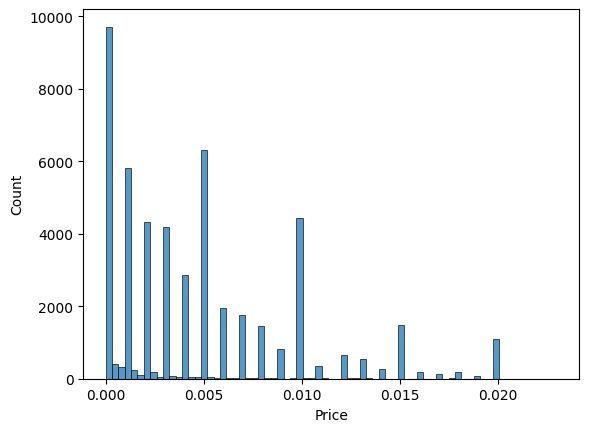

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_no_outliers, x='Price')
plt.show()

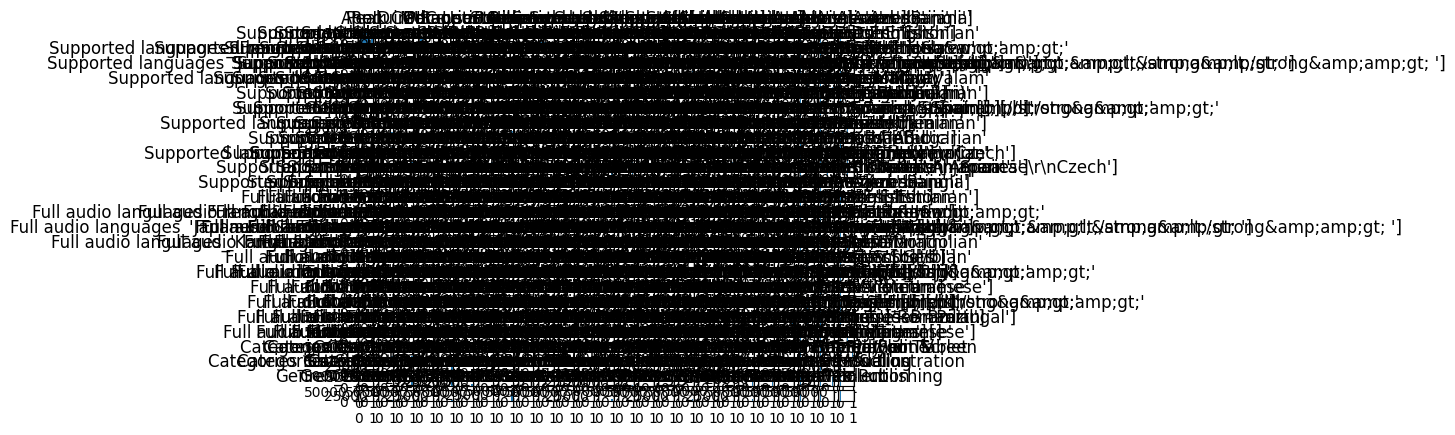

In [17]:
df_no_outliers.hist()
plt.show()

In [ ]:
skewed_cols = df_no_outliers.skew(numeric_only=True)
skewed_cols = skewed_cols[skewed_cols.abs() > 1].index

df_log_transformed = df_no_outliers.copy()
df_log_transformed[skewed_cols] = np.log1p(df_log_transformed[skewed_cols])

for col in skewed_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_log_transformed[col], bins=30, kde=True)
    plt.title(f"Distribuição após log: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()